In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure

In [2]:
sales = pd.read_csv("C:/Users/alexs/Pet_projects/sales.csv", sep =',')

A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summaries of various customers for selected high-volume products from last month.
The data set also contains customer demographics (age, gender, marital status, city type, stay in the current city), product details (productid and product category) and Total purchase amount from last month.

Now, they want to build a model to predict the purchase amount of customers against various products which will help them to create a personalized offer for customers against different products.

Tasks to perform

The purchase column is the Target Variable, perform Univariate Analysis and Bivariate Analysis w.r.t the Purchase.

Masked in the column description means already converted from categorical value to numerical column.

Below mentioned points are just given to get you started with the dataset, not mandatory to follow the same sequence.


DATA PREPROCESSING

Check the basic statistics of the dataset

Check for missing values in the data

Check for unique values in data

Perform EDA

Purchase Distribution

Check for outliers

Analysis by Gender, Marital Status, occupation, occupation vs purchase, purchase by city, purchase by age group, etc

Drop unnecessary fields

Convert categorical data into integer using map function (e.g 'Gender' column)

Missing value treatment

Rename columns

Fill nan values

map range variables into integers (e.g 'Age' column)

Data Visualisation

visualize individual column
Age vs Purchased
Occupation vs Purchased
Productcategory1 vs Purchased
Productcategory2 vs Purchased
Productcategory3 vs Purchased
City category pie chart
check for more possible plots

In [3]:
sales.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
#Making all columns in lower case and replacing blank spaces with '_'
sales.columns = sales.columns.str.lower().str.replace(' ', '_')

In [5]:
sales.isnull().sum()

user_id                            0
product_id                         0
gender                             0
age                                0
occupation                         0
city_category                      0
stay_in_current_city_years         0
marital_status                     0
product_category_1                 0
product_category_2            173638
product_category_3            383247
purchase                           0
dtype: int64

In [6]:
#We can see there's missing data in product_catergory_2 and product_catergory_3
#We'll replace NaN values into 0

In [7]:
sales = sales.fillna(0)

In [8]:
sales.isnull().sum()

user_id                       0
product_id                    0
gender                        0
age                           0
occupation                    0
city_category                 0
stay_in_current_city_years    0
marital_status                0
product_category_1            0
product_category_2            0
product_category_3            0
purchase                      0
dtype: int64

In [9]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   user_id                     550068 non-null  int64  
 1   product_id                  550068 non-null  object 
 2   gender                      550068 non-null  object 
 3   age                         550068 non-null  object 
 4   occupation                  550068 non-null  int64  
 5   city_category               550068 non-null  object 
 6   stay_in_current_city_years  550068 non-null  object 
 7   marital_status              550068 non-null  int64  
 8   product_category_1          550068 non-null  int64  
 9   product_category_2          550068 non-null  float64
 10  product_category_3          550068 non-null  float64
 11  purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [10]:
sales.describe()

,user_id,occupation,marital_status,product_category_1,product_category_2,product_category_3,purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,6.735436,3.841941,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,6.215492,6.250712,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,0.000000,0.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,0.000000,0.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,5.000000,0.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,14.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [11]:
sales.user_id.nunique()

5891

In [13]:
#let's see what's it look like in gender split
sales.gender.unique()

array(['F', 'M'], dtype=object)

In [14]:
sales

,user_id,product_id,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,product_category_1,product_category_2,product_category_3,purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,0.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,0.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,0.0,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,0.0,0.0,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,0.0,0.0,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,0.0,0.0,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,0.0,0.0,365


In [28]:
#Number of persons by gender
sales.groupby(['user_id','gender'], as_index = False)\
    .agg({'product_id':'count'})\
    .groupby('gender',as_index = False)\
    .agg({'user_id':'count'})\
    .rename(columns ={'user_id':'quantity'})

,gender,quantity
0,F,1666
1,M,4225


In [34]:
#Number of purchases by gender
sales.groupby('gender', as_index= False)\
    .agg({'purchase':'count'})

,Gender,Purchase
0,F,135809
1,M,414259


In [35]:
#Revenue by gender
sales.groupby('gender', as_index= False)\
    .agg({'purchase':'sum'})

,Gender,Purchase
0,F,1186232642
1,M,3909580100


In [36]:
#ARPU by gender
ARPU_gender = sales.groupby('gender', as_index= False)\
    .agg({'purchase':'mean'})
ARPU_gender

,Gender,Purchase
0,F,8734.565765
1,M,9437.526040


In [40]:
#City category
sales.groupby('city_category', as_index= False)\
    .agg({'user_id':'count'})

,city_category,user_id
0,A,147720
1,B,231173
2,C,171175


In [41]:
#Age
sales.age.unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [45]:
#total revenue by age group
sales.groupby('age', as_index= False)\
    .agg({'purchase':'sum'})

,age,purchase
0,0-17,134913183
1,18-25,913848675
2,26-35,2031770578
3,36-45,1026569884
4,46-50,420843403
5,51-55,367099644
6,55+,200767375


In [46]:
#ARPU by age group
sales.groupby('age', as_index= False)\
    .agg({'purchase':'mean'})

,age,purchase
0,0-17,8933.464640
1,18-25,9169.663606
2,26-35,9252.690633
3,36-45,9331.350695
4,46-50,9208.625697
5,51-55,9534.808031
6,55+,9336.280459


As we can see groups with most revenue overall are 26-35, although ARPU are at similar level at all age groups, so most likely there's larger amount of people fall into 26-35 group

In [49]:
sales.groupby('age', as_index= False)\
    .agg({'purchase':'count'})

,age,purchase
0,0-17,15102
1,18-25,99660
2,26-35,219587
3,36-45,110013
4,46-50,45701
5,51-55,38501
6,55+,21504


Let's see if those groups are most popular in each city category

In [53]:
sales

,user_id,product_id,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,product_category_1,product_category_2,product_category_3,purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,0.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,0.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,0.0,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,0.0,0.0,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,0.0,0.0,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,0.0,0.0,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,0.0,0.0,365


In [97]:
df_city = sales.groupby(['age','city_category'],as_index=False)\
    .agg({'user_id':'count'})\
    .rename(columns ={'user_id':'quantity'})
df_city

,age,city_category,quantity
0,0-17,A,2544
1,0-17,B,5435
2,0-17,C,7123
3,18-25,A,27535
4,18-25,B,43247
5,18-25,C,28878
6,26-35,A,73745
7,26-35,B,91584
8,26-35,C,54258
9,36-45,A,26617


In [94]:
df_city

city_category,A,B,C
age,,,
0-17,2544,5435,7123
18-25,27535,43247,28878
26-35,73745,91584,54258
36-45,26617,47598,35798
46-50,7607,20406,17688
51-55,6099,17741,14661
55+,3573,5162,12769


In [98]:
df_city = df_city.pivot(index='age', columns='city_category', values='quantity')
df_city

city_category,A,B,C
age,,,
0-17,2544,5435,7123
18-25,27535,43247,28878
26-35,73745,91584,54258
36-45,26617,47598,35798
46-50,7607,20406,17688
51-55,6099,17741,14661
55+,3573,5162,12769


<AxesSubplot:xlabel='age'>

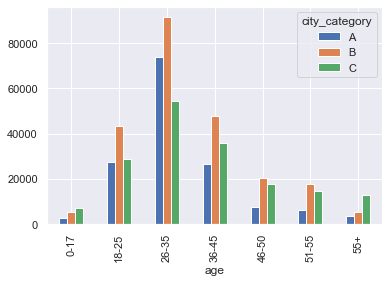

In [86]:
df_city.plot(kind = 'bar')

As we can see, groups 26-35 are most popular in all city categories as well and most popular city is B

In [96]:
df_gender = sales.groupby(['age','gender'],as_index=False)\
    .agg({'user_id':'count'})\
    .rename(columns ={'user_id':'quantity'})
df_gender

,age,gender,quantity
0,0-17,F,5083
1,0-17,M,10019
2,18-25,F,24628
3,18-25,M,75032
4,26-35,F,50752
5,26-35,M,168835
6,36-45,F,27170
7,36-45,M,82843
8,46-50,F,13199
9,46-50,M,32502


In [99]:
df_gender = df_gender.pivot(index='age', columns='gender', values='quantity')
df_gender

gender,F,M
age,,
0-17,5083,10019
18-25,24628,75032
26-35,50752,168835
36-45,27170,82843
46-50,13199,32502
51-55,9894,28607
55+,5083,16421


<AxesSubplot:xlabel='age'>

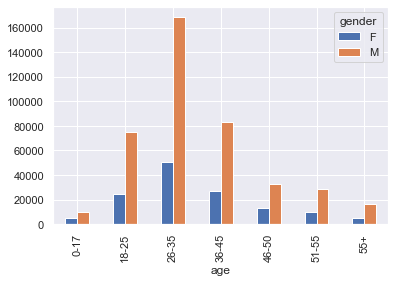

In [100]:
df_gender.plot(kind = 'bar')

A large amount of purchases of 26-35 group are made by men

So we can say that men of the age group 26-35 will likely to buy something from our store. Let's explore men 26-35 furter

Let's see occupation disturbution betwwen age groups and gender

In [113]:
#age and occupation
df_occ_age = sales.groupby(['age','occupation'],as_index=False)\
    .agg({'user_id':'count'})\
    .rename(columns ={'user_id':'quantity'})\
    .pivot (index='age', columns='occupation', values='quantity')

NameError: name 'plt' is not defined

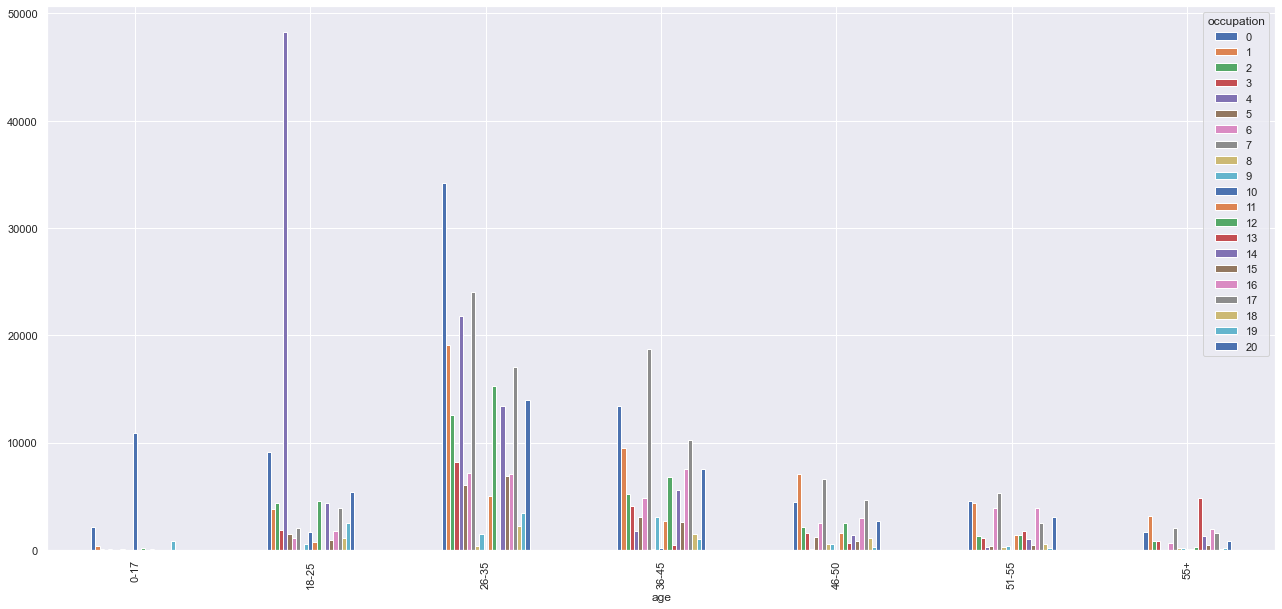

In [123]:
df_occ_age.plot(kind='bar', figsize=(22, 10))
plt.legend(loc=(1,0))

In [114]:
#age and occupation
df_occ_gender= sales.groupby(['gender','occupation'],as_index=False)\
    .agg({'user_id':'count'})\
    .rename(columns ={'user_id':'quantity'})\
    .pivot (index='gender', columns='occupation', values='quantity')

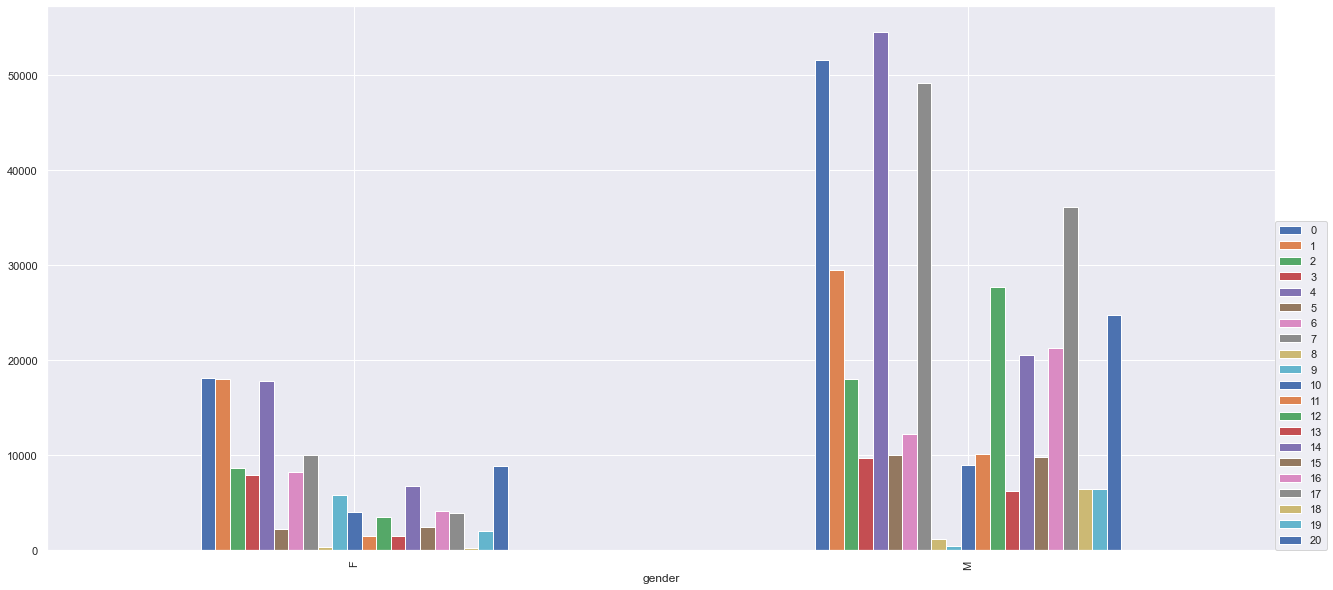

In [126]:
df_occ_gender.plot(kind='bar', figsize=(22, 10))
plt.legend(loc=(1,0))

Now let's see same values but only for men in age group 26-35

In [29]:
men_26_35 = sales[(sales.gender == 'M') & (sales.age =='26-35')]
men_26_35

,user_id,product_id,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,product_category_1,product_category_2,product_category_3,purchase
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,0.0,15227
9,1000005,P00274942,M,26-35,20,A,1,1,8,0.0,0.0,7871
10,1000005,P00251242,M,26-35,20,A,1,1,5,11.0,0.0,5254
11,1000005,P00014542,M,26-35,20,A,1,1,8,0.0,0.0,3957
12,1000005,P00031342,M,26-35,20,A,1,1,8,0.0,0.0,6073
...,...,...,...,...,...,...,...,...,...,...,...,...
550034,1005988,P00372445,M,26-35,15,B,1,1,20,0.0,0.0,479
550055,1006019,P00372445,M,26-35,0,A,4+,0,20,0.0,0.0,238
550056,1006022,P00375436,M,26-35,17,C,4+,0,20,0.0,0.0,254
550057,1006023,P00370853,M,26-35,0,C,2,1,19,0.0,0.0,61


In [30]:
men_26_35

,user_id,product_id,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,product_category_1,product_category_2,product_category_3,purchase
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,0.0,15227
9,1000005,P00274942,M,26-35,20,A,1,1,8,0.0,0.0,7871
10,1000005,P00251242,M,26-35,20,A,1,1,5,11.0,0.0,5254
11,1000005,P00014542,M,26-35,20,A,1,1,8,0.0,0.0,3957
12,1000005,P00031342,M,26-35,20,A,1,1,8,0.0,0.0,6073
...,...,...,...,...,...,...,...,...,...,...,...,...
550034,1005988,P00372445,M,26-35,15,B,1,1,20,0.0,0.0,479
550055,1006019,P00372445,M,26-35,0,A,4+,0,20,0.0,0.0,238
550056,1006022,P00375436,M,26-35,17,C,4+,0,20,0.0,0.0,254
550057,1006023,P00370853,M,26-35,0,C,2,1,19,0.0,0.0,61


In [31]:
men_26_35.user_id.nunique()

1508

In [32]:
men_26_35_uniqiue = men_26_35.drop_duplicates()

In [33]:
men_26_35_uniqiue

,user_id,product_id,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,product_category_1,product_category_2,product_category_3,purchase
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,0.0,15227
9,1000005,P00274942,M,26-35,20,A,1,1,8,0.0,0.0,7871
10,1000005,P00251242,M,26-35,20,A,1,1,5,11.0,0.0,5254
11,1000005,P00014542,M,26-35,20,A,1,1,8,0.0,0.0,3957
12,1000005,P00031342,M,26-35,20,A,1,1,8,0.0,0.0,6073
...,...,...,...,...,...,...,...,...,...,...,...,...
550034,1005988,P00372445,M,26-35,15,B,1,1,20,0.0,0.0,479
550055,1006019,P00372445,M,26-35,0,A,4+,0,20,0.0,0.0,238
550056,1006022,P00375436,M,26-35,17,C,4+,0,20,0.0,0.0,254
550057,1006023,P00370853,M,26-35,0,C,2,1,19,0.0,0.0,61


In [34]:
men_26_35_uniqiue = men_26_35_uniqiue.groupby(['user_id','occupation'],as_index = False)\
    .agg({'gender':'count'})

In [35]:
men_26_35_uniqiue

,user_id,occupation,gender
0,1000003,15,29
1,1000005,20,106
2,1000008,12,77
3,1000009,17,58
4,1000012,12,11
...,...,...,...
1503,1006023,0,88
1504,1006024,12,60
1505,1006030,17,59
1506,1006034,14,12


In [36]:
men_26_35_uniqiue_occupation = men_26_35_uniqiue.groupby('occupation',as_index = False)\
    .agg({'user_id':'count'})

In [37]:
men_26_35_uniqiue_occupation

,occupation,user_id
0,0,201
1,1,85
2,2,81
3,3,30
4,4,138
5,5,40
6,6,43
7,7,189
8,8,6
9,9,1


No handles with labels found to put in legend.


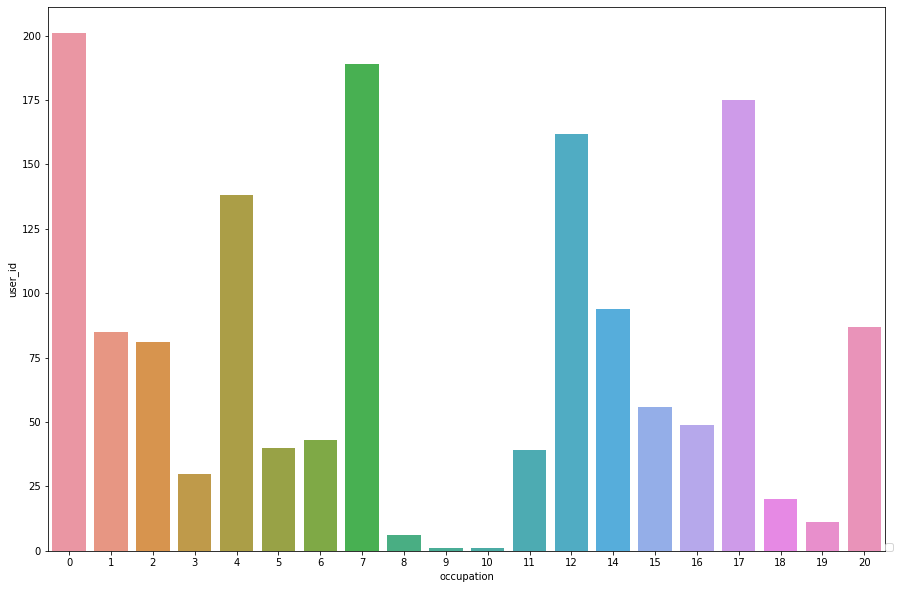

In [39]:
figure(figsize=(15, 10))
sns.barplot (data= men_26_35_uniqiue_occupation, x ='occupation', y = 'user_id')

As we can see at the barplot above - large amount of men have occupation 0, 7, 17 (i'm taking into account above 175 persons per occupation)

In [40]:
sales

,user_id,product_id,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,product_category_1,product_category_2,product_category_3,purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,0.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,0.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,0.0,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,0.0,0.0,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,0.0,0.0,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,0.0,0.0,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,0.0,0.0,365


In [49]:
men_26_35.groupby(['user_id','marital_status'],as_index = False)\
    .agg({'occupation':'count'})\
    .groupby('marital_status',as_index = False)\
    .agg({'user_id':'count'})

,marital_status,user_id
0,0,924
1,1,584


More likely 0 is single

Let's gether all conclusion we made so far
Our top buyer is single man, in the age group 26-35, from city 'B', with occupation '0', '7' or '17' 

Now let's explore which product category they will likely to buy

In [58]:
men_26_35.agg({'product_category_1':'sum','product_category_2':'sum','product_category_3':'sum'})

product_category_1     878517.0
product_category_2    1132488.0
product_category_3     676450.0
dtype: float64

Most popular category by purchases is catergory 2, but as we can see all 3 catergories are in demand, so i'm not gonna single out just one catergory

##### As a final conslusion - after EDA we can say that we should focus at single men, in the age group 26-35, from city 'B', with occupation '0', '7' or '17' 